<a href="https://colab.research.google.com/github/michelmartinss/Data_Preparation/blob/main/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploração de dados
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

### 1 - Leia o arquivo e inspecione os dados

In [ ]:
# Carregar o Arquivo
df = pd.read_csv('/content/data.csv', sep=',', encoding='ISO-8859-1')

In [ ]:
# Visualizar os 5 primeiros registros das tabelas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Resumo Estatístico
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Visualizar as variáveis, os tipos, a qtd de coluna, qtd de registros e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 2 - Valores faltantes na identificação do cliente

In [ ]:
# Identificar valores nulos

df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
# Visualizar os valores nulos em %
round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

In [ ]:
# Removendo os valores nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Checando o resumo estatístico
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 3 - Preços unitários e quantidade de produtos


In [ ]:
# Checando se há registros igual ou menor que zero em 'UnitPrice'
from typing import Counter
Counter(df[df['UnitPrice'] <=0 | df['UnitPrice'].isnull()].count())

Counter({40: 8})

In [ ]:
# Aplicando filtro no dataframe para considerar somente os registros acima de 0
df = df[df['UnitPrice'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Description  406789 non-null  object 
 3   Quantity     406789 non-null  int64  
 4   InvoiceDate  406789 non-null  object 
 5   UnitPrice    406789 non-null  float64
 6   CustomerID   406789 non-null  float64
 7   Country      406789 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
# Checando se há registros igual ou menor que zero em 'Quantity'
Counter(df[df['Quantity'] <=0 | df['Quantity'].isnull()].count())

Counter({8905: 8})

In [ ]:
# Aplicando filtro no dataframe para considerar somente os registros acima de 0
df = df[df['Quantity'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


### 4 - Verifique se existem linhas duplicadas


In [ ]:
# Checando se há registros duplicados
df.duplicated().any()

True

In [ ]:
# Levantando a quantidade de registros duplicados
df.duplicated().sum()

5192

In [ ]:
# Analisando a relação de registros duplicados
(df.
groupby(df.columns.tolist(), dropna=False)
.size()
.to_frame('n_duplicates')
.query('n_duplicates >1')
.sort_values('n_duplicates',ascending=False).head()
)

n_duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                     
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        6/5/2011 11:37   2.95      16923.0    United Kingdom            20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        6/5/2011 11:37   2.95      16923.0    United Kingdom            12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       10/26/2011 12:46 1.25      14102.0    United Kingdom             8
541266    21755     LOVE BUILDING BLOCK WORD            1        1/16/2011 16:25  5.95      15673.0    United Kingdom             6
538514    21756     BATH BUILDING BLOCK WORD            1        12/12/2010 14:27 5.95      15044.0    United Kingdom             6

In [ ]:
# Remover valores duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Checando a remoção de valores duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


### 5 -  Tipos de dados da coluna


In [ ]:
df[['CustomerID','InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   392692 non-null  float64
 1   InvoiceDate  392692 non-null  object 
dtypes: float64(1), object(1)
memory usage: 9.0+ MB


In [ ]:
# Visualizando os dados
df[['CustomerID','InvoiceDate']].head(1)

,CustomerID,InvoiceDate
0,17850.0,12/1/2010 8:26


In [ ]:
# Transformando o type'CustomerID' para inteiro
df[['CustomerID']] = df[['CustomerID']].astype(int)

In [ ]:
# Transformando o type'InvoiceDate' para data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Checando o dtype
df[['CustomerID','InvoiceDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  int64         
 1   InvoiceDate  392692 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.0 MB


### 6 - Tratando os outliers

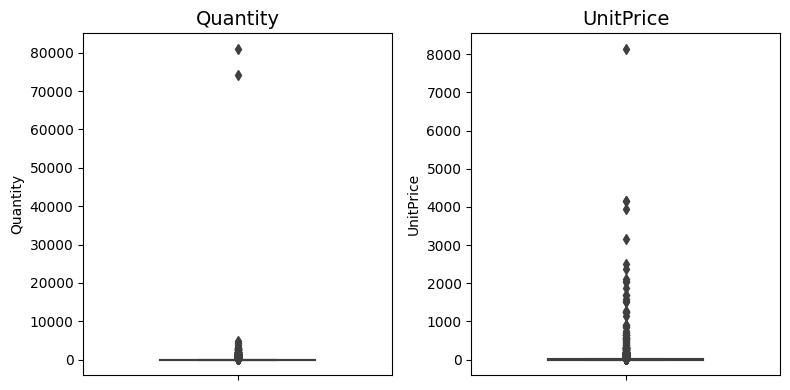

In [ ]:
# Plotando os boxplots
plt.figure(figsize=(8, 4))

# Boxplot para Quantity
sns.boxplot(y='Quantity', data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 1))
plt.title('Quantity', fontsize=14)

# Boxplot para UnitPrice
sns.boxplot(y="UnitPrice", data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 2))
plt.title('UnitPrice', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

In [ ]:
# Aplicando filtro para 'Quantity' até 10000, removendo os outliers acima de 10.000
df = df[df['Quantity'] <= 10000]

In [ ]:
# Aplicando filtro para 'UnitPrice' até 5000, removendo os outliers acima de 5000
df = df[df['UnitPrice'] <= 5000]

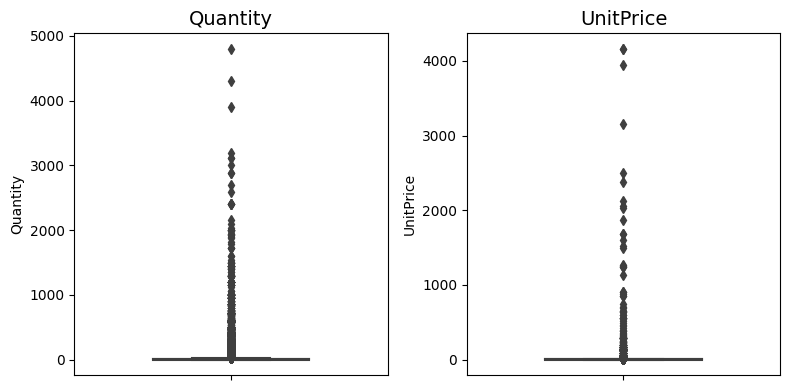

In [ ]:
# Plotando os boxplots
plt.figure(figsize=(8, 4))

# Boxplot para Quantity
sns.boxplot(y='Quantity', data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 1))
plt.title('Quantity', fontsize=14)

# Boxplot para UnitPrice
sns.boxplot(y="UnitPrice", data=df, color='#1f77b4', width=0.5, ax=plt.subplot(1, 2, 2))
plt.title('UnitPrice', fontsize=14)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

### 7 - Crie uma coluna adicional com o valor Total da Compra


In [ ]:
# Criando uma nova coluna, com o valor total da compra, multiplicando a 'Quantity' pelo 'UnitPrice'
df['TotalCompra'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 8 - Última data da compra

In [ ]:
# Configurando a data para ano - mes - dia
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

# Criando uma nova coluna com a data da última compra, para cálculo da recência.
df['DataUltimaCompra'] = df['InvoiceDate'].max()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra,DataUltimaCompra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,2011-12-09
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,2011-12-09
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,2011-12-09


### 9 - Plotando gráficos

#### 1 - Top 10 países com maior valor em vendas


In [ ]:
top10Paises = df.groupby('Country')['TotalCompra'].sum().reset_index().head(10)

In [ ]:
top10Paises.sort_values('TotalCompra',ascending=False)

,Country,TotalCompra
0,Australia,138453.81
3,Belgium,41196.34
6,Channel Islands,20440.54
9,Denmark,18955.34
7,Cyprus,13502.85
1,Austria,10198.68
5,Canada,3666.38
4,Brazil,1143.60
8,Czech Republic,826.74
2,Bahrain,548.40


In [ ]:
# Criar o gráfico de barras do Top 10 paises
fig = px.bar(top10Paises, x=top10Paises["Country"], y=top10Paises["TotalCompra"].sort_values(ascending=False),
             color_discrete_sequence=['#1f77b4'],
             title="Top 10 países com maior valor em vendas")

# Configurar layout do gráfico (opcional)
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Total de Compra",
    barmode="group",
    showlegend=False)

fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white')

# Adicionar rótulos para cada barra
fig.update_traces(
    text=top10Paises["TotalCompra"].sort_values(ascending=False).map('{:,.2f}'.format),
    textposition='outside')

# Exibir o gráfico
fig.show()

#### 2 - Top 10 produtos mais vendidos


In [ ]:
top10produtos = df.groupby('Description')['TotalCompra'].sum().reset_index().head(10)

In [ ]:
top10produtos.sort_values('TotalCompra',ascending=False)

,Description,TotalCompra
8,SET 2 TEA TOWELS I LOVE LONDON,7190.95
9,SPACEBOY BABY GIFT SET,7048.55
2,DOLLY GIRL BEAKER,2754.50
1,50'S CHRISTMAS GIFT BAG LARGE,2272.25
7,RED SPOT GIFT BAG LARGE,2023.50
3,I LOVE LONDON MINI BACKPACK,1449.85
6,OVAL WALL MIRROR DIAMANTE,1050.00
5,NINE DRAWER OFFICE TIDY,777.90
0,4 PURPLE FLOCK DINNER CANDLES,265.66
4,I LOVE LONDON MINI RUCKSACK,4.15


In [ ]:
# Criar o gráfico de barras top 10 produtos
fig = px.bar(top10produtos, x=top10produtos["Description"], y=top10produtos["TotalCompra"].sort_values(ascending=False),
             color_discrete_sequence=['#1f77b4'],
             title="Top 10 produtos mais vendidos")

# Configurar layout do gráfico (opcional)
fig.update_layout(
    xaxis_title="Produtos",
    yaxis_title="Total de Compra",
    barmode="group",
    showlegend=False,
    xaxis=dict(tickmode='linear'),
    height=600)

fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white')

# Adicionar rótulos para cada barra
fig.update_traces(
    text=top10produtos["TotalCompra"].sort_values(ascending=False).map('{:,.2f}'.format),
    textposition='outside')

# Exibir o gráfico
fig.show()

#### 9.3 - Valor de venda total por mês


In [ ]:
df['anoMes'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCompra,DataUltimaCompra,anoMes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.3,2011-12-09,2010-12


In [ ]:
vendasmes = df.groupby('anoMes')['TotalCompra'].sum().reset_index()
vendasmes

,anoMes,TotalCompra
0,2010-12,570422.730
1,2011-01,490917.710
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,669212.400
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


In [ ]:
# Criar o gráfico de barras das vendas por mês
fig = px.bar(vendasmes, x=vendasmes["anoMes"], y=vendasmes["TotalCompra"].sort_values(ascending=False),
             color_discrete_sequence=['#1f77b4'],
             title="Valor de venda total por mês")

# Configurar layout do gráfico (opcional)
fig.update_layout(
    xaxis_title="Vendas por Mês",
    yaxis_title="Total de Compra",
    barmode="group",
    xaxis=dict(tickmode='array', tickvals=vendasmes['anoMes'], ticktext=vendasmes['anoMes'].tolist()),
    height=600)

# Rotacionar rótulos do eixo x para melhor legibilidade
fig.update_xaxes(tickangle=45)

fig.update_xaxes(showline=True, showgrid=False, linecolor='black')
fig.update_yaxes(showline=True, showgrid=False, linecolor='black')

# Definir o fundo de cada subplot como branco
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white')

# Adicionar rótulos para cada barra
fig.update_traces(
    text=vendasmes["TotalCompra"].sort_values(ascending=False).map('{:,.2f}'.format),
    textposition='outside')

# Exibir o gráfico
fig.show()

#### 9.4 - Valor de venda total por mês e por país (considere apenas os top 10)

In [ ]:
VendaMestop10paises = df.groupby(['anoMes','Country'])['TotalCompra'].sum().reset_index()
VendaMestop10paises

,anoMes,Country,TotalCompra
0,2010-12,Australia,965.35
1,2010-12,Austria,277.20
2,2010-12,Belgium,1809.91
3,2010-12,Channel Islands,363.53
4,2010-12,Cyprus,1587.07
...,...,...,...
282,2011-12,Portugal,2808.19
283,2011-12,Spain,316.21
284,2011-12,Sweden,238.00
285,2011-12,USA,885.24


In [ ]:
# Selecionar os top 10 países com base no total de compras
top10_paises = top10Paises.nlargest(10, 'TotalCompra')['Country']

# Filtrar o DataFrame original para incluir apenas os top 10 países
df_top10 = df[df['Country'].isin(top10_paises)]

# Fazer o groupby considerando apenas os top 10 países
VendaMesTop10Paises = df_top10.groupby(['anoMes', 'Country'], as_index=False)['TotalCompra'].sum()

VendaMesTop10Paises

,anoMes,Country,TotalCompra
0,2010-12,Australia,965.35
1,2010-12,Austria,277.20
2,2010-12,Belgium,1809.91
3,2010-12,Channel Islands,363.53
4,2010-12,Cyprus,1587.07
...,...,...,...
70,2011-11,Denmark,2699.57
71,2011-12,Austria,683.20
72,2011-12,Belgium,1417.73
73,2011-12,Channel Islands,198.40


In [ ]:
# Com esse gráfico, será possivel ter uma vizualização geral e consultar pais por pais, já que a lib plotly possui interação
# Criar o gráfico de barras empilhadas
fig = px.bar(VendaMesTop10Paises,
             x='anoMes',
             y='TotalCompra',
             color='Country',
             title='Valor de venda total por mês e por país (Top 10)',
             category_orders={"MonthYear": sorted(VendaMestop10paises['anoMes'].unique())},
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Configurar layout do gráfico
fig.update_layout(
    xaxis_title="Mês",
    yaxis_title="Valor de Venda Total",
    barmode="stack",  # Barras empilhadas
    showlegend=True,  # Mostrar legenda
    legend_title="País",
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(tickmode='array', tickvals=vendasmes['anoMes'], ticktext=vendasmes['anoMes'].tolist()),
    height=600
)

# Adicionar rótulos para cada barra
fig.update_traces(
    text=VendaMestop10paises.groupby(['anoMes', 'Country'])['TotalCompra'].sum().reset_index()['TotalCompra'].map('{:,.2f}'.format),
    textposition='outside'
)

# Exibir o gráfico
fig.show()

In [ ]:
# Mas para ficar claro e evidente, vou plotar os 10 países, sendo um gráfico para cada um.

# Calcular o total de compras por país
total_compras_por_pais = df.groupby('Country')['TotalCompra'].sum().reset_index().head(10)

# Ordenar os top 10 países pelo total de compras
top10_paises_ordenados = total_compras_por_pais.nlargest(10, 'TotalCompra')['Country']

# Criar subplots com 5 linhas e 2 colunas
fig = make_subplots(rows=5, cols=2, subplot_titles=top10_paises_ordenados)

# Garantir que todos os DataFrames tenham a mesma lista de meses
meses_com_vendas = VendaMesTop10Paises['anoMes'].unique()


# Iterar sobre os top 10 países e adicionar gráficos de barras empilhadas
for i, pais in enumerate(top10_paises_ordenados, 1):
    df_pais = VendaMesTop10Paises[VendaMesTop10Paises['Country'] == pais]

    # Garantir que 'anoMes' seja do tipo datetime
    VendaMesTop10Paises.loc[VendaMesTop10Paises['Country'] == pais, 'anoMes'] = pd.to_datetime(df_pais['anoMes'], errors='coerce')

    # Preencher DataFrame com zeros para os meses sem vendas
    df_pais = df_pais.groupby(['anoMes'], as_index=False)['TotalCompra'].sum()
    df_pais = df_pais.set_index('anoMes').reindex(meses_com_vendas, fill_value=0).reset_index()

    # Adicionar gráfico de barras para cada país
    fig.add_bar(
        x=df_pais['anoMes'],
        y=df_pais['TotalCompra'],
        name=pais,
        marker_color='#1f77b4',
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

    # Definir rótulos do eixo x no formato desejado (yyyy - mm)
    fig.update_xaxes(
        tickvals=df_pais['anoMes'],
        ticktext=df_pais['anoMes'],
        row=(i - 1) // 2 + 1,
        col=(i - 1) % 2 + 1
    )

# Atualizar layout dos subplots
fig.update_layout(
    height=1200,  # Ajustar conforme necessário
    showlegend=False,  # Mostrar legenda apenas uma vez
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(tickmode='array', tickvals=vendasmes['anoMes'], ticktext=vendasmes['anoMes'].tolist()))

# Rotacionar rótulos do eixo x para melhor legibilidade
fig.update_xaxes(tickangle=45)

# Exibir o gráfico
fig.show();


### 10 - Cálculo do RFM

- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.


In [ ]:
# Calculando RFM

# 1. Calcular Recência
data_atual = df['DataUltimaCompra']
recencia_df = df.groupby('InvoiceNo')['InvoiceDate'].max().reset_index()
recencia_df['Recencia'] = (data_atual - recencia_df['InvoiceDate']).dt.days

# 2. Calcular Frequência
frequencia_df = df.groupby('InvoiceNo').size().reset_index(name='Frequencia')

# 3. Calcular Valor Ticket Medio
valor_TicketMedio_df = df.groupby('InvoiceNo')['TotalCompra'].mean().reset_index(name='TicketMedio')

# 4. Agrupar os Resultados
rfm_df = pd.merge(recencia_df[['InvoiceNo', 'Recencia']], frequencia_df, on='InvoiceNo')
rfm_df = pd.merge(rfm_df, valor_TicketMedio_df, on='InvoiceNo')

rfm_df.head()

,InvoiceNo,Recencia,Frequencia,TicketMedio
0,536365,373.0,7,19.874286
1,536366,373.0,2,11.100000
2,536367,373.0,12,23.227500
3,536368,373.0,4,17.512500
4,536369,373.0,1,17.850000


In [ ]:
# Calaculando o RFM através de um groupby e validando valores, usanso uma sintaxe mais enxuta
data_atual = df['DataUltimaCompra'].max()

rfm = df.groupby('InvoiceNo').agg(
    Recencia=('InvoiceDate', lambda dates: (data_atual - dates.max()).days),
    Frequencia=('InvoiceDate', 'size'),
    TicketMedio=('TotalCompra', 'mean')
).reset_index()

rfm.head()

,InvoiceNo,Recencia,Frequencia,TicketMedio
0,536365,373,7,19.874286
1,536366,373,2,11.100000
2,536367,373,12,23.227500
3,536368,373,4,17.512500
4,536369,373,1,17.850000
